In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Find Class Imbalance

In [2]:
from common.src import resample as res

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
X, y = res.to_numpy_array(path)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................{0: 1.9448173005219984, 1: 0.6730322580645162}


C:\Users\mmitk\Anaconda3\envs\pnenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [3]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [4]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [5]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 50, class_weights = class_weights)

Epoch 1/50
163/163 [==============================] - 55s 335ms/step - loss: 0.5496 - tp: 3759.0000 - fp: 1613.0000 - tn: 3603.0000 - fn: 1457.0000 - accuracy: 0.7057 - precision: 0.6997 - recall: 0.7207 - auc: 0.7874 - val_loss: 0.5577 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7891
Epoch 2/50
163/163 [==============================] - 51s 314ms/step - loss: 0.3457 - tp: 4411.0000 - fp: 783.0000 - tn: 4433.0000 - fn: 805.0000 - accuracy: 0.8478 - precision: 0.8492 - recall: 0.8457 - auc: 0.9237 - val_loss: 0.5766 - val_tp: 171.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 133.0000 - val_accuracy: 0.5938 - val_precision: 0.6000 - val_recall: 0.5625 - val_auc: 0.7207
Epoch 3/50
163/163 [==============================] - 8914s 55s/step - loss: 0.3121 - tp: 4491.0000 - fp: 730.0000 - tn: 4486.0000 - fn: 725.0000 - accuracy: 0.8605 - precision: 0.8602 - recall: 0.8610 - au

Epoch 22/50
163/163 [==============================] - 51s 311ms/step - loss: 0.1580 - tp: 4867.0000 - fp: 355.0000 - tn: 4861.0000 - fn: 349.0000 - accuracy: 0.9325 - precision: 0.9320 - recall: 0.9331 - auc: 0.9832 - val_loss: 0.3925 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9102
Epoch 23/50
163/163 [==============================] - 51s 311ms/step - loss: 0.1665 - tp: 4856.0000 - fp: 357.0000 - tn: 4859.0000 - fn: 360.0000 - accuracy: 0.9313 - precision: 0.9315 - recall: 0.9310 - auc: 0.9814 - val_loss: 0.3887 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9082
Epoch 24/50
163/163 [==============================] - 52s 319ms/step - loss: 0.1475 - tp: 4894.0000 - fp: 320.0000 - tn: 4896.0000 - fn: 322.0000 - accuracy: 0.9385 - precision: 0.9386 - recall: 0.9383 - auc

Epoch 43/50
163/163 [==============================] - 51s 312ms/step - loss: 0.1321 - tp: 4936.0000 - fp: 281.0000 - tn: 4935.0000 - fn: 280.0000 - accuracy: 0.9462 - precision: 0.9461 - recall: 0.9463 - auc: 0.9879 - val_loss: 0.3051 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9453
Epoch 44/50
163/163 [==============================] - 51s 310ms/step - loss: 0.1295 - tp: 4951.0000 - fp: 270.0000 - tn: 4946.0000 - fn: 265.0000 - accuracy: 0.9487 - precision: 0.9483 - recall: 0.9492 - auc: 0.9889 - val_loss: 0.2940 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9648
Epoch 45/50
163/163 [==============================] - 52s 317ms/step - loss: 0.1339 - tp: 4952.0000 - fp: 265.0000 - tn: 4951.0000 - fn: 264.0000 - accuracy: 0.9493 - precision: 0.9492 - recall: 0.9494 - auc

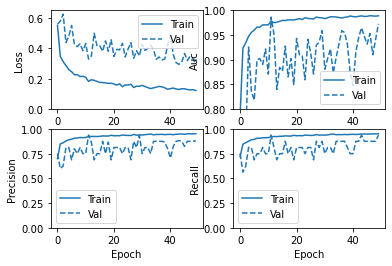

In [6]:
cnn.plot_history()

In [7]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.91      0.87      0.89       234
   PNEUMONIA       0.92      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.91       624
weighted avg       0.92      0.92      0.92       624

None


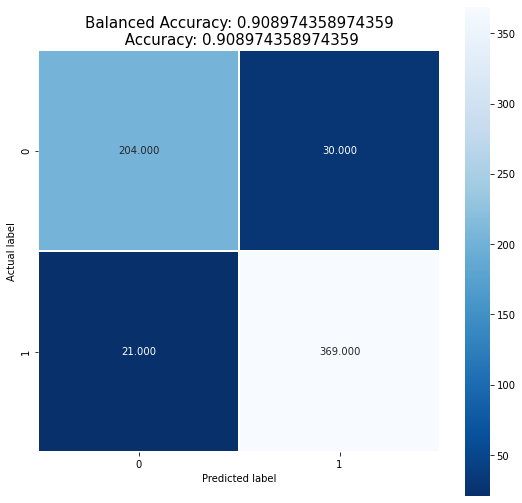

In [8]:
cnn.display_confusion_matrix(test_data_generator = test_set)